In [16]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

import requests
from bs4 import BeautifulSoup

from time import sleep
import os
import pandas as pd
import json

from openpyxl import Workbook, load_workbook

In [4]:
wb = Workbook()
ws = wb.active
wb.save('팔로워 추출 테스트.xlsx')

In [5]:
# 제목 적기
sub = ['게시자', '내용', '업로드 시간']
for kwd, j in zip(sub, list(range(1, len(sub)+1))):
    ws.cell(row=1, column=j).value = kwd

wb.save('팔로워 추출 테스트.xlsx')

In [6]:
browser = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome
[WDM] - Driver [C:\Users\alsoj\.wdm\drivers\chromedriver\win32\103.0.5060.53\chromedriver.exe] found in cache


In [45]:
browser.get(url)
sleep(3)
follower_cnt = browser.find_element(by=By.XPATH, value='/html/body/div[1]/div/div[1]/div/div[1]/div/div/div[1]/div[1]/section/main/div/header/section/ul/li[2]/a/div/span')


In [54]:
get_follower_cnt(browser, 'mimimi_na_style')

'11.8K'

In [38]:
url = 'https://www.instagram.com/ddohousing/'

In [61]:
# Follwer수 추출
def get_follower_cnt(browser, url):
#     url = 'https://www.instagram.com/{}/'.format(id)
    browser.get(url)
    sleep(3)
    follower_cnt = browser.find_element(by=By.XPATH, value='/html/body/div[1]/div/div[1]/div/div[1]/div/div/div[1]/div[1]/section/main/div/header/section/ul/li[2]/a/div/span')

    return follower_cnt.text

In [36]:
def get_follower_cnt(id):
    url = 'https://www.instagram.com/{}/'.format(id)
    res = requests.get(url)
    soup = BeautifulSoup(res.text, "html.parser")
    
    print(soup)
    
    meta_tag = soup.find('meta', property="og:description")
    
    return meta_tag.attrs['content'].split(' Followers')[0]

In [66]:
# 특정 태그로 검색시 최근 사진 돌기
browser.get('https://www.instagram.com/explore/tags/%EC%95%88%EC%82%B0%EB%A7%9B%EC%A7%91/')

In [68]:
recent_post = browser.find_element(by=By.XPATH, value='/html/body/div[1]/div/div[1]/div/div[1]/div/div/div[1]/div[1]/section/main/article/div[2]/div/div[1]/div[1]/a/div/div[2]')

In [69]:
recent_post.click()

In [70]:
writer = browser.find_element(by=By.XPATH, value='/html/body/div[1]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a')

In [71]:
writer_url = writer.get_attribute('href')

In [72]:
get_follower_cnt(browser, writer_url)

'2,118'

In [1]:
def find_user_id(browser, username, logger):
    try:
        user_id = browser.execute_script(
            "return window._sharedData.entry_data.PostPage[0].graphql.shortcode_media.owner.id")
    except WebDriverException:
        try:
            browser.execute_script("location.reload()")
            user_id = browser.execute_script(
                "return window._sharedData.entry_data.PostPage[0].graphql.shortcode_media.owner.id")
        except WebDriverException:
            user_id = browser.execute_script(
                "return window._sharedData.entry_data.ProfilePage[0].graphql.user.id")

    return user_id

## 특정 태그로 검색해서 최근 게시물 돌기

In [7]:
tag_keyword = '안산맛집'
tag_url = f'https://www.instagram.com/explore/tags/{tag_keyword}'
browser.get(tag_url)

In [9]:
# recent_post = browser.find_element(by=By.CSS_SELECTOR, value='#mount_0_0_0w > div > div:nth-child(1) > div > div.rq0escxv.l9j0dhe7.du4w35lb > div > div > div > div.j83agx80.cbu4d94t.d6urw2fd.dp1hu0rb.l9j0dhe7.du4w35lb > div._a3gq._ab-1 > section > main > article > div:nth-child(3) > div > div:nth-child(1) > div:nth-child(1) > a')
recent_post = browser.find_element(by=By.XPATH, value='//*[@id="mount_0_0_8s"]/div/div[1]/div/div[1]/div/div/div/div[1]/div[1]/section/main/article/div[2]/div/div[1]/div[1]/a')
recent_post.click()

In [10]:
next_button = browser.find_element(by=By.XPATH, value='//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div[2]/button')
next_button.click()

In [21]:
user_name = browser.find_element(by=By.XPATH, value='//*[@id="mount_0_0_0w"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a')
print("user_name : ", user_name.text)
      
content = browser.find_element(by=By.XPATH, value='//*[@id="mount_0_0_0w"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span')
print("content : ", content.text)
      
upload_time = browser.find_element(by=By.XPATH, value='//*[@id="mount_0_0_0w"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[2]/div/div/a/div/time')
print("upload_time : ", upload_time.get_attribute('datetime'))

user_name :  gimtaegun9220
content :  "이제!"
시원한 막걸리 한잔하면서
슬슬
창업준비 하셔야죠^^
이 어려운시기에
콩나물국밥 창업이 대세죠!

내가사는 지역에서
"남이 먼저하기전에
내가먼저 창업하자!"

자세한 사항은 전화 또는
네이버에서
전주콩나물국밥 유명한집을
검색해주세요!

전주콩나물국밥 유명한집(본점)
맛, 비법전수창업문의
직통: 010-5150-1370
#서울맛집 #부산맛집 #인천맛집 #대구맛집 #광주맛집 #울산맛집 #경기도맛집#일산맛집#구리시맛집 #고양시맛집#분당맛집 #용인맛집 #성남맛집 #수원맛집 #오산시맛집 #마산맛집 #목포맛집 #순천맛집 #강릉맛집 #안산맛집 #천안맛집#마산맛집 #대전맛집 #제주도맛집#남양주맛집#거제도맛집#포항맛집#동탄맛집#하남맛집 #영천동맛집 #2동탄맛집
upload_time :  2022-07-09T00:26:28.000Z


In [22]:
for i in range(10000):
    try :
        temp_list = []
        user_name = browser.find_element(by=By.XPATH, value='//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a')
        temp_list.append(user_name.text)

        content = browser.find_element(by=By.XPATH, value='//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span')
        temp_list.append(content.text)

        upload_time = browser.find_element(by=By.XPATH, value='//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[2]/div/div/a/div/time')
        temp_list.append(upload_time.get_attribute('datetime'))

        ws.append(temp_list)

        if i > 0 and i % 100 == 0:
            wb.save('팔로워 추출 테스트.xlsx')
            sleep(60)

        next_button = browser.find_element(by=By.XPATH, value='//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div[2]/button')
        next_button.click()
        sleep(1)
        
    except NoSuchElementException as nse:
        print(i, "번째 작업 수행 중 오류 발생 : ", nse)
        sleep(3)

        try: 
            temp_list = []
            user_name = browser.find_element(by=By.XPATH, value='//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a')
            temp_list.append(user_name.text)

            content = browser.find_element(by=By.XPATH, value='//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span')
            temp_list.append(content.text)

            upload_time = browser.find_element(by=By.XPATH, value='//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[2]/div/div/a/div/time')
            temp_list.append(upload_time.get_attribute('datetime'))

            ws.append(temp_list)

            if i > 0 and i % 100 == 0:
                wb.save('팔로워 추출 테스트.xlsx')
                sleep(60)

            next_button = browser.find_element(by=By.XPATH, value='//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[1]/div/div/div[2]/button')
            next_button.click()        
            continue
        except Exception as e:
            print(i, "i번째 작업 수행 중 오류 발생 : ", e)
            wb.save('팔로워 추출 테스트.xlsx')
            continue
        
    except Exception as e:
        print(i, "i번째 작업 수행 중 오류 발생 : ", e)
        wb.save('팔로워 추출 테스트.xlsx')
        continue

0 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25]

5 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25]


13 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25]

21 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25]

29 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25]

37 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25]

45 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25]

53 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25]

61 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25]

69 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25]

77 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25]

85 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25]

93 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25]

101 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

109 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

117 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

125 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

133 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

141 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

149 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

157 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

165 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

173 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

181 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

189 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

195 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+2

199 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

203 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

207 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

211 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

215 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

219 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

223 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

227 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

231 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

235 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+


239 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

243 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

247 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

251 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

255 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

259 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

263 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

267 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

271 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

275 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

279 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

283 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

287 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

291 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

295 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

299 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

303 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

307 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

311 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

315 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

319 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

323 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

327 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

331 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

335 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

339 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

343 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

347 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

351 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

355 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

359 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

363 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

367 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

371 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

375 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

379 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

383 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

387 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

391 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

395 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

399 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

403 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

407 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+


411 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

415 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

419 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

423 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

427 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

431 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

435 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+

442 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

450 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

458 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

466 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

474 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

482 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

490 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

498 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

506 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

514 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

522 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

530 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

538 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

546 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

554 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

562 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

570 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

578 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

586 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

594 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

602 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

610 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

618 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

626 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

634 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

642 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

650 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

658 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

666 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

674 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

682 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

690 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

698 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

706 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

714 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

722 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

730 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

738 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

746 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

754 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

762 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

770 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

778 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

786 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

794 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

802 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

810 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

818 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

826 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

889 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

897 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

905 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

913 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

921 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

929 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

937 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

945 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

953 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

961 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

969 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

977 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

985 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

993 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+25

1001 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+2

1009 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+2

1017 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+2

1025 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+2

1033 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+2

1041 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+2

1049 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+2

1057 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+2

1118 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+2

1126 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+2

1134 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+2

1142 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+2

1150 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+2

1155 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1159 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1163 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1167 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1171 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1175 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1179 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1183 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1187 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1191 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1195 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1199 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1203 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1207 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1211 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1215 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1219 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1223 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1227 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1231 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1235 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1239 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1243 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1247 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1251 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1255 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1259 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1263 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1267 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1271 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1275 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1279 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1283 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1287 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1291 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1295 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1299 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1303 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1307 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1311 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1315 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1319 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1323 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1327 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1331 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1335 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1339 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1343 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1347 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1351 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1355 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1359 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1363 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1367 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1371 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1375 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1379 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1383 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1387 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1391 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1395 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1399 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1403 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1407 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1411 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1415 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1419 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1423 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1427 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1431 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1435 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1439 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1443 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1447 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1451 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1455 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1459 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1463 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1467 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1471 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1475 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1479 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1483 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1487 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1491 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1495 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1499 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1503 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1507 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1511 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1515 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1519 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1523 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1527 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1531 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1535 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1539 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1543 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1547 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1551 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1555 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1559 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1563 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1567 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1571 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1575 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1579 i번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[2]/div[1]/ul/div/li/div/div/div[2]/div[1]/span"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29

1584 번째 작업 수행 중 오류 발생 :  Message: no such element: Unable to locate element: {"method":"xpath","selector":"//*[@id="mount_0_0_8s"]/div/div[1]/div/div[2]/div/div/div[1]/div/div[3]/div/div/div/div/div[2]/div/article/div/div[2]/div/div/div[1]/div/header/div[2]/div[1]/div[1]/div/span/a"}
  (Session info: chrome=103.0.5060.114)
Stacktrace:
Backtrace:
	Ordinal0 [0x00F26463+2188387]
	Ordinal0 [0x00EBE461+1762401]
	Ordinal0 [0x00DD3D78+802168]
	Ordinal0 [0x00E01880+989312]
	Ordinal0 [0x00E01B1B+989979]
	Ordinal0 [0x00E2E912+1173778]
	Ordinal0 [0x00E1C824+1099812]
	Ordinal0 [0x00E2CC22+1166370]
	Ordinal0 [0x00E1C5F6+1099254]
	Ordinal0 [0x00DF6BE0+945120]
	Ordinal0 [0x00DF7AD6+948950]
	GetHandleVerifier [0x011C71F2+2712546]
	GetHandleVerifier [0x011B886D+2652765]
	GetHandleVerifier [0x00FB002A+520730]
	GetHandleVerifier [0x00FAEE06+516086]
	Ordinal0 [0x00EC468B+1787531]
	Ordinal0 [0x00EC8E88+1805960]
	Ordinal0 [0x00EC8F75+1806197]
	Ordinal0 [0x00ED1DF1+1842673]
	BaseThreadInitThunk [0x7740FA29+2

KeyboardInterrupt: 

In [17]:
for i in range(10):
    ws.append(['test', i, '내용'])

In [18]:
wb.save('팔로워 추출 테스트.xlsx')

## 인스타그램 게시글 정보 추출(좋아요, 댓글 등)

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException

browser = webdriver.Chrome(service=Service(ChromeDriverManager().install()))

[WDM] - ====== WebDriver manager ======
[WDM] - Current google-chrome version is 103.0.5060
[WDM] - Get LATEST chromedriver version for 103.0.5060 google-chrome
[WDM] - Driver [C:\Users\alsoj\.wdm\drivers\chromedriver\win32\103.0.5060.134\chromedriver.exe] found in cache


In [33]:
comment_list = browser.find_element(by=By.XPATH, value='/html/body/div[1]/div/div/div/div[1]/div/div/div/div[1]/div[1]/section/main/div[1]/div[1]/article/div/div[2]/div/div[2]/div[1]/ul')

In [36]:
a_tag = comment_list.find_elements(by=By.TAG_NAME, value='a')

In [37]:
for a in a_tag:
    print(a.get_)

<selenium.webdriver.remote.webelement.WebElement (session="f271b430b9215783dee167347a44ff63", element="48b5765a-4d14-4479-b4db-300a9d79205b")>
<selenium.webdriver.remote.webelement.WebElement (session="f271b430b9215783dee167347a44ff63", element="0759fec9-4a42-403b-9c39-a0a2e2b0ec97")>
<selenium.webdriver.remote.webelement.WebElement (session="f271b430b9215783dee167347a44ff63", element="2bffb0f8-4d9c-4bc5-ba4d-248d1b2d27e8")>
<selenium.webdriver.remote.webelement.WebElement (session="f271b430b9215783dee167347a44ff63", element="93470a78-ed1b-453a-9593-19ee05a8bd47")>
<selenium.webdriver.remote.webelement.WebElement (session="f271b430b9215783dee167347a44ff63", element="14f77ea8-f1ed-4b8f-90e6-6dcb08f2a586")>
<selenium.webdriver.remote.webelement.WebElement (session="f271b430b9215783dee167347a44ff63", element="c07f383d-c0d8-44b4-bb3e-b4a56598c28a")>
<selenium.webdriver.remote.webelement.WebElement (session="f271b430b9215783dee167347a44ff63", element="46eaf82c-f013-4a0c-b452-7a6bd642c808")>

In [16]:
import csv
import requests
import json
import time
import os

url = 'https://www.instagram.com/graphql/query/'

short_code = input('enter your source code: ')
end_crusor = ''

count = 0
start_file = 1
per_file = 250

try:
    os.mkdir('resultfile')
except FileExistsError:
    pass

# create csv file
writer = csv.writer(open(f'resultfile/{short_code} {start_file}.csv', 'w', newline=''))
headers = ['Username', 'Full Name', 'private account', 'Profil Pic']
writer.writerow(headers)


graphql_endpoint = 'https://www.instagram.com/graphql/query/'
# graphql_likers = (graphql_endpoint + '?query_hash=d5d763b1e2acf209d62d22d184488e57')
graphql_likers = (graphql_endpoint + '?query_hash=bc3296d1ce80a24b1b6e40b1e72903f5')

variables = {}
variables['shortcode'] = short_code
variables['first'] = 50
variables['after'] = end_crusor

while True:
    
    url = (
        '{}&variables={}'
        .format(graphql_likers, str(json.dumps(variables)))
    )
    
    # to handling status code 429: too many request, head use cookie dan use sesionid
#     head = {'cookie': 'sessionid=7429511270%3ALmcYgPkn7I8gUG%3A24%3AAYe0Rdp7PUW_uUOhWtZxGei32SU6FQQeoAZuJ4UgBg'}

    req = browser.get(url)
    print(req)
    
    # to handling limitation, then a time lag is given if it fails to retrieve data
    try:
        user = req['data']['shortcode_media']['edge_liked_by']['edges']
    except:
        print('wait for 30 sec')
        time.sleep(30)
        continue

    for i in user:
        # for splitting file
        if count % per_file == 0 and count != 0:
            start_file += 1
            writer = csv.writer(open(f'resultfile/{short_code} {start_file}.csv', 'w', newline=''))
            headers = ['Username', 'Full Name', 'private account', 'Profil Pic']
            writer.writerow(headers)
        username = i['node']['username']
        fullname = i['node']['full_name']
        private = i['node']['is_private']
        profilpic = i['node']['profile_pic_url']
        count += 1
        print(f'{count}. {username} full name: {fullname}. profil pic link: {profilpic}. private? {private}')

        # live update data
        writer = csv.writer(open(f'resultfile/{short_code} {start_file}.csv', 'a', newline='', encoding='utf-8'))
        data = [username, fullname, private, profilpic]
        writer.writerow(data)

    # search all data
    end_crusor = req['data']['shortcode_media']['edge_liked_by']['page_info']['end_cursor']
    has_next_page = req['data']['shortcode_media']['edge_liked_by']['page_info']['has_next_page']
    if not has_next_page:
        break

    # to handling limitation, then a time lag is given if it fails to retrieve data
    time.sleep(2)

print(f'total data is {count}')

enter your source code: CgLjdzVL9_W
None
wait for 30 sec
None
wait for 30 sec


KeyboardInterrupt: 

In [6]:
import requests
from bs4 import BeautifulSoup

In [12]:
# url = 'https://i.instagram.com/api/v1/media/2885555965869940694/comments/?can_support_threading=true&min_id={"cached_comments_cursor": "17988678028525424", "bifilter_token": "KDwBEABIACgAIAAQAAgACAAIAAgAz4hvc7uvDP__qrsaH295a-X7_fCT3vf_Nd22ND4dv4h2qoZSF0DUAgAA"}'
url = 'https://i.instagram.com/api/v1/media/2885555965869940694/comments/?can_support_threading=true&permalink_enabled=false'

In [13]:
headers = {
            "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36",
            "content-type":"application/json", 
            "origin": "https://www.instagram.com",
            "referer": "https://www.instagram.com",
            "cookie": "sessionid=7429511270%3AIE46lX86k01ELs%3A26%3AAYc71TB4X2KgQwPZgItDHeDod6k0sUOFL3sADpmCJA; "
          }

In [14]:
res = requests.get(url)

'<!DOCTYPE html>\n<html lang="en" class="no-js not-logged-in client-root">\n    <head>\n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n        <title>\nLogin • Instagram\n</title>\n\n        \n        <meta name="robots" content="noimageindex, noarchive">\n        <meta name="apple-mobile-web-app-status-bar-style" content="default">\n        <meta name="mobile-web-app-capable" content="yes">\n        <meta name="theme-color" content="#ffffff">\n        \n        <meta id="viewport" name="viewport" content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1, viewport-fit=cover">\n        <link rel="manifest" href="/data/manifest.json">\n\n        <link rel="preload" href="/static/bundles/metro/ConsumerUICommons.css/35d6cea47dcf.css" as="style" type="text/css" crossorigin="anonymous" />\n<link rel="preload" href="/static/bundles/metro/Consumer.css/f4fa2d4df5c9.css" as="style" type="text/css" crossorigin="anonymous" />\n
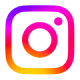
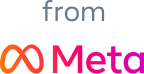

In [15]:
res.text

In [31]:
html = requests.get(url).text
soup = BeautifulSoup(html, "html.parser")

<!DOCTYPE html>

<html class="no-js not-logged-in client-root" lang="en">
<head>
<meta charset="utf-8"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<title>
Login • Instagram
</title>
<meta content="noimageindex, noarchive" name="robots"/>
<meta content="default" name="apple-mobile-web-app-status-bar-style"/>
<meta content="yes" name="mobile-web-app-capable"/>
<meta content="#ffffff" name="theme-color"/>
<meta content="width=device-width, initial-scale=1, minimum-scale=1, maximum-scale=1, viewport-fit=cover" id="viewport" name="viewport"/>
<link href="/data/manifest.json" rel="manifest"/>
<link as="style" crossorigin="anonymous" href="/static/bundles/metro/ConsumerUICommons.css/35d6cea47dcf.css" rel="preload" type="text/css">
<link as="style" crossorigin="anonymous" href="/static/bundles/metro/Consumer.css/f4fa2d4df5c9.css" rel="preload" type="text/css"/>
<link as="style" crossorigin="anonymous" href="/static/bundles/metro/FBSignupPage.css/55ba8f05e763.css" rel="preload" typ
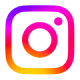
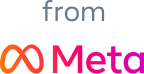

In [32]:
soup

In [25]:
browser.get(url)

In [13]:
import requests
def get_user_by_user_id(user_id):
    user = {}
    if user_id:
        base_url = "https://i.instagram.com/api/v1/users/{}/info/"
        #valid user-agent
        headers = {
            'user-agent':'Mozilla/5.0 (iPhone; CPU iPhone OS 12_3_1 like Mac OS X) AppleWebKit/605.1.15 (KHTML, like Gecko) Mobile/15E148 Instagram 105.0.0.11.118 (iPhone11,8; iOS 12_3_1; en_US; en-US; scale=2.00; 828x1792; 165586599)'
        }
        try:
            res       = requests.get(base_url.format(user_id),headers=headers)
            user_info = res.json()
            user      = user_info.get('user',{})
        except Exception as e:
            print("getting user failed, due to '{}'".format(e.message))
    return user

In [14]:
user_id='alsoj_pic'
get_user_by_user_id(user_id) #ta-dah!

AttributeError: 'JSONDecodeError' object has no attribute 'message'

- query_hash=69cba40317214236af40e7efa697781d
--> 게시물 팔로우 팔로워 보여줌
- query_hash=69cba40317214236af40e7efa697781d
--> 게시글 조회
- query_hash=bc3296d1ce80a24b1b6e40b1e72903f5
--> 게시글 댓글 조회